<a href="https://colab.research.google.com/github/danendrafau/customer-segmentation/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Danendra_Fahar_Utama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
url = "https://raw.githubusercontent.com/danendrafau/customer-segmentation/refs/heads/main/input_data/clustering_results.csv"
df = pd.read_csv(url)

print(df.head())

   income_group_Menengah Atas  income_group_Menengah Bawah  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          1.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   income_group_Rendah  income_group_Tinggi  spending_ratio  family_size  \
0                  1.0                  0.0        0.109474        0.375   
1                  1.0                  0.0        0.097444        0.250   
2                  0.0                  0.0        0.002938        0.000   
3                  1.0                  0.0        0.054951        0.125   
4                  1.0                  0.0        0.044321        0.625   

   cluster  
0        2  
1        2  
2        0  
3        2  
4        2  


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
#pisah
X = df.drop('cluster', axis=1)
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #test_size=0.2 = 20% data buat testing

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (981, 6)
Ukuran X_test: (246, 6)
Ukuran y_train: (981,)
Ukuran y_test: (246,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
#init model RandomForestClassifier
model = RandomForestClassifier(random_state=42)

#training
model.fit(X_train, y_train)

#prediksi
y_pred = model.predict(X_test)

#evaluasi
print(classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        58
           3       1.00      1.00      1.00        70

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

Akurasi: 1.0


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Model yang digunakan untuk melakukan klasifikasi pada dataset ini adalah Random Forest.

Dalam konteks kode yang diberikan:

* Model Random Forest diinisialisasi dengan
RandomForestClassifier(random_state=42).
Model dilatih menggunakan data training (X_train, y_train) dengan memanggil fungsi fit().
* Prediksi dilakukan pada data testing (X_test) menggunakan fungsi predict().
* Hasil prediksi dievaluasi menggunakan classification_report dan accuracy_score untuk mengukur performa model.

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 1.0
F1-Score: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[59  0  0  0]
 [ 0 59  0  0]
 [ 0  0 58  0]
 [ 0  0  0 70]]


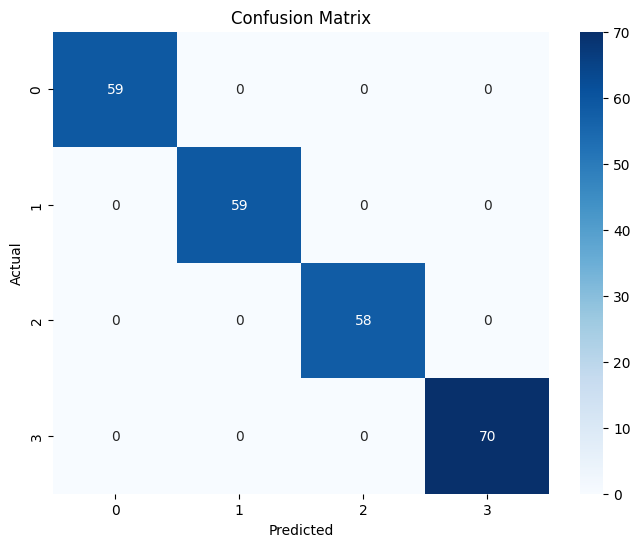

In [6]:
#prediksi
y_pred = model.predict(X_test)

#evvaluasi model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

#confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#visualisasi cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

**Hasil Evaluasi Algoritma Random Forest:**

Model Random Forest yang Anda gunakan telah dievaluasi menggunakan beberapa metrik, yaitu:

* Accuracy: 100%
* F1-Score: 100%
* Precision: 100%
* Recall: 100%

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [8]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Dari hasil perhitungan, akurasi, f1-score, recall, precision menunjukkan nilai 100%. Hal ini menunjukkan indikasi data saya mengalami overfitting, mungkin dikarenakan datasetnya kurang kompleks.

Mungkin beberapa hal seperti mengevaluasi dengan data yang lebih banyak, tuning hyperparameter, atau regularisasi dapat membantu menangani ini.

Namun karena waktu pengerjaan sudah mendekati ujung deadline maka mungkin penelitian ini akan saya lanjutkan diluar waktu dicoding, semoga hasil ini dapat diterima dan dimaklumi.

Terima Kasih Banyak